In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
cntry_fund_frac_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_fund_frac.csv'
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pubs_author_funder.csv"

In [3]:
cntry_fund_df=pd.read_csv(cntry_fund_frac_path)
cntry_fund_df.head()

,fund_cntry,cnt_frac,year,funded,intcol
0,Turkey,1.0,2009,1,0
1,United States,1.0,2009,1,1
2,Russia,1.0,2009,1,0
3,Spain,1.0,2009,1,0
4,Spain,1.0,2009,1,1


In [8]:
cntry_fund_df=cntry_fund_df.groupby(['year','fund_cntry'])['cnt_frac'].sum().reset_index()
cntry_fund_df.head()

,year,fund_cntry,cnt_frac
0,2009,Algeria,83.283333
1,2009,Andorra,2.000000
2,2009,Angola,0.500000
3,2009,Argentina,2702.798107
4,2009,Armenia,43.924242


In [12]:
def gini_coef(alist):
    """ Gini Coefficient """
    cum_x = np.cumsum(sorted(np.append(alist, 0)))
    sum_x = cum_x[-1]
    xarray = np.array(range(0, len(cum_x))) / np.float(len(cum_x) - 1)
    yarray = cum_x / sum_x
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A + B)

In [18]:
cntry_fund_df=cntry_fund_df[cntry_fund_df.fund_cntry!='Not-Funded']

In [19]:
yearlist=cntry_fund_df.year.unique()
result=[]
for year in yearlist:
    df_filter=cntry_fund_df[cntry_fund_df.year==year]
    values=df_filter['cnt_frac'].values
    gini=gini_coef(values)
    result.append([year,gini])

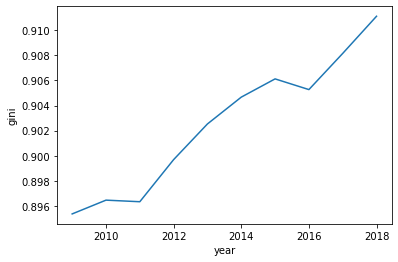

In [23]:
result_df=pd.DataFrame(result,columns=['year','gini'])
sns.lineplot(x='year',y='gini',data=result_df)

In [4]:
pubs_author_funder = pd.read_csv(pubs_path)
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x:literal_eval(x) if pd.notnull(x) else "Not-Funded")
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [5]:
pubs_author_funder['author_distinct']=pubs_author_funder['author_country'].apply(lambda x:list(set(x)))
pubs_author_funder['funder_distinct']=pubs_author_funder['funder_country'].apply(
    lambda x:list(set(x)) if x!='Not-Funded' else 'Not-Funded')

In [27]:
pubs_author_funder['coauthor']=pubs_author_funder['author_distinct'].apply(
    lambda x:1 if len(x)>1 else 0)
pubs_author_funder['cofund']=pubs_author_funder['funder_distinct'].apply(
    lambda x:1 if (len(x)>1 and x!='Not-Funded') else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,coauthor,cofund
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,[Turkey],[Turkey],0,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,"[United States, France]",[United States],1,0
2,30574691,[Russia],[Russia],83,2009,0.312,4,[Russia],[Russia],0,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,[Spain],[Spain],0,0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,"[Spain, Germany]",[Spain],1,0


In [35]:
pubs_author_funder.head(20)

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,coauthor,cofund
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,[Turkey],[Turkey],0,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,"[United States, France]",[United States],1,0
2,30574691,[Russia],[Russia],83,2009,0.312,4,[Russia],[Russia],0,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,[Spain],[Spain],0,0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,"[Spain, Germany]",[Spain],1,0
5,30585101,[United States],[United States],89,2009,1.230,9,[United States],[United States],0,0
6,30585102,[United States],[United States],89,2009,0.137,1,[United States],[United States],0,0
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,"[Ireland, United Kingdom]",[Ireland],1,0
8,30585104,[Japan],[Japan],89,2009,0.410,3,[Japan],[Japan],0,0
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,"[United States, Canada]",[Canada],1,0


In [39]:
cntry_author=[]
cntry_fund=[]
for ind, row in pubs_author_funder.iterrows():
    authors=row['author_distinct']
    funders=row['funder_distinct']
    year=row['year']
    coaut=row['coauthor']
    cofund=row['cofund']
    num_a=len(authors)
    num_f=len(funders)
    for a in authors:
        cntry_author.append([year,a,1/num_a,coaut])
    if funders!='Not-Funded':
        for f in funders:
            cntry_fund.append([year,f,1/num_f,cofund])


In [41]:
author_df=pd.DataFrame(cntry_author, columns=['year','cntry','cnt','coll'])
fund_df=pd.DataFrame(cntry_fund,columns=['year','cntry','cnt','coll'])

In [55]:
def cal_gini(data,colname):
    data=data.groupby(['year','cntry'])['cnt'].sum().reset_index()
    result=[]
    for year in yearlist:
        df_filter=data[data.year==year]
        values=df_filter['cnt'].values
        gini=gini_coef(values)
        result.append([year,gini])
    result_df=pd.DataFrame(result, columns=['year',colname])
    return result_df

In [58]:
aut_all=cal_gini(author_df,'aut_all')
aut_col=cal_gini(author_df[author_df.coll==1],'aut_col')
fund_all=cal_gini(fund_df,'fund_all')
fund_col=cal_gini(fund_df[fund_df.coll==1],'fund_col')

In [81]:
test=fund_df.groupby(['year','cntry'])['cnt'].sum().reset_index()
test=test[test.year==2018]
test['cnt']=test['cnt']/test['cnt'].sum()
test.sort_values(by='cnt',ascending=False)[:2]['cnt'].sum()

0.4828982674982022

In [63]:
result_df

,year,gini
0,2009,0.895353
1,2010,0.896452
2,2011,0.896325
3,2012,0.899685
4,2013,0.902530
5,2014,0.904669
6,2015,0.906125
7,2016,0.905272
8,2017,0.908157
9,2018,0.911122
